In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("data_football_home_advantage.csv", sep=";")
df

,League,Season,Club,Pts Home,Pts Away,Pts Total
0,Bundesliga,2022/2023,Dortmund,44,27,71
1,Bundesliga,2022/2023,RB Leipzig,41,25,66
2,Bundesliga,2022/2023,Union Berlin,39,23,62
3,Bundesliga,2022/2023,Bayern Munich,38,33,71
4,Bundesliga,2022/2023,Freiburg,34,25,59
...,...,...,...,...,...,...
485,Serie A,2018/2019,Fiorentina,24,17,41
486,Serie A,2018/2019,SPAL,22,20,42
487,Serie A,2018/2019,Parma,22,19,41
488,Serie A,2018/2019,Chievo,10,9,19


In [16]:
df['Share Home']=df['Pts Home']/df['Pts Total']
df

,League,Season,Club,Pts Home,Pts Away,Pts Total,Share Home
0,Bundesliga,2022/2023,Dortmund,44,27,71,0.619718
1,Bundesliga,2022/2023,RB Leipzig,41,25,66,0.621212
2,Bundesliga,2022/2023,Union Berlin,39,23,62,0.629032
3,Bundesliga,2022/2023,Bayern Munich,38,33,71,0.535211
4,Bundesliga,2022/2023,Freiburg,34,25,59,0.576271
...,...,...,...,...,...,...,...
485,Serie A,2018/2019,Fiorentina,24,17,41,0.585366
486,Serie A,2018/2019,SPAL,22,20,42,0.523810
487,Serie A,2018/2019,Parma,22,19,41,0.536585
488,Serie A,2018/2019,Chievo,10,9,19,0.526316


In [17]:
df_per_league = df.groupby(['League'])['Share Home'].mean().reset_index()
df_per_league['Share Home'] = df_per_league['Share Home'].round(3)
df_per_league

,League,Share Home
0,Bundesliga,0.579
1,La Liga,0.600
2,La Ligue 1,0.567
3,Premier League,0.566
4,Serie A,0.551


In [18]:
variance = df.groupby('League')['Share Home'].var().reset_index()
variance

,League,Share Home
0,Bundesliga,0.009375
1,La Liga,0.006933
2,La Ligue 1,0.007530
3,Premier League,0.007658
4,Serie A,0.006303


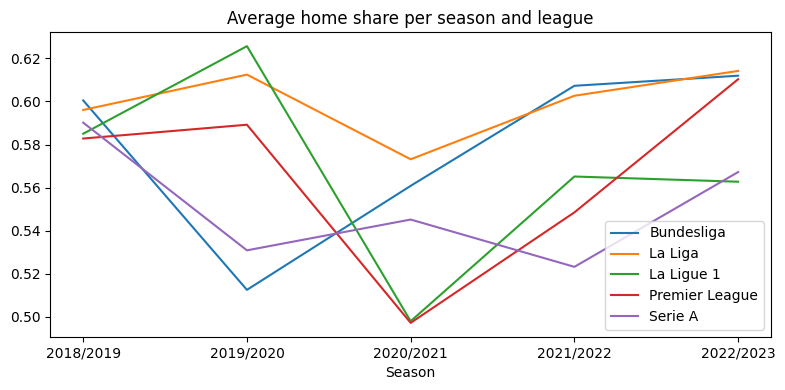

In [20]:
# timeline during the pandemic
grouped = df.groupby(['League', 'Season'])['Share Home'].mean().reset_index()

plt.figure(figsize=(8, 4))

for league, group in grouped.groupby('League'):
    plt.plot(group['Season'], group['Share Home'], label=league)

plt.title('Average home share per season and league')
plt.xlabel('Season')
plt.legend()
plt.tight_layout()
plt.show()



In [21]:
# Average per club for each league

sorted_dfs = {}

for league in df_per_club['League'].unique():
    current_league = df_per_club[df_per_club['League'] == league]
    sorted_league = current_league.sort_values(by='Share Home', ascending=False)
    sorted_dfs[league] = sorted_league

# show results
for league, sorted_df in sorted_dfs.items():
    print(f"\n{league}:\n")
    display(sorted_df.reset_index(drop=True).style)



Bundesliga:



,League,Club,Share Home
0,Bundesliga,FC Nurnberg,0.842105
1,Bundesliga,Greuther Furth,0.777778
2,Bundesliga,Hannover 96,0.761905
3,Bundesliga,Bochum,0.704762
4,Bundesliga,Stuttgart,0.638853
5,Bundesliga,Union Berlin,0.635401
6,Bundesliga,Monchengladbach,0.618233
7,Bundesliga,FC Augsburg,0.613074
8,Bundesliga,Dusseldorf,0.606818
9,Bundesliga,Schalke 04,0.603452



La Liga:



,League,Club,Share Home
0,La Liga,Almeria,0.804878
1,La Liga,Mallorca,0.736830
2,La Liga,Alaves,0.677585
3,La Liga,Rayo Vallecano,0.666596
4,La Liga,Valencia,0.643197
5,La Liga,Huesca,0.641711
6,La Liga,Getafe,0.631622
7,La Liga,Elche,0.627249
8,La Liga,Espanyol,0.614618
9,La Liga,Granada,0.614049



La Ligue 1:



,League,Club,Share Home
0,La Ligue 1,Lorient,0.664069
1,La Ligue 1,Amiens,0.646453
2,La Ligue 1,Auxerre,0.628571
3,La Ligue 1,Dijon,0.625210
4,La Ligue 1,Brest,0.625138
5,La Ligue 1,Rennes,0.604783
6,La Ligue 1,Angers,0.598427
7,La Ligue 1,Guingamp,0.592593
8,La Ligue 1,Nantes,0.584598
9,La Ligue 1,Toulouse,0.581646



Premier League:



,League,Club,Share Home
0,Premier League,Nottm Forest,0.789474
1,Premier League,Sheffield Utd,0.653382
2,Premier League,Norwich City,0.629870
3,Premier League,Bournemouth,0.608731
4,Premier League,Everton,0.592417
5,Premier League,West Ham Utd,0.590952
6,Premier League,Cardiff City,0.588235
7,Premier League,Tottenham,0.581707
8,Premier League,West Brom,0.576923
9,Premier League,Wolverhampton,0.575953



Serie A:



,League,Club,Share Home
0,Serie A,Crotone,0.739130
1,Serie A,Empoli,0.618424
2,Serie A,Hellas Verona,0.607463
3,Serie A,Bologna,0.598461
4,Serie A,Genoa,0.594816
5,Serie A,Cremonese,0.592593
6,Serie A,AS Roma,0.588666
7,Serie A,Fiorentina,0.581066
8,Serie A,Cagliari,0.575194
9,Serie A,Spezia,0.569755


In [22]:
home_disadvantage = df_per_club[df_per_club['Share Home']<0.5]
home_disadvantage

,League,Club,Share Home
17,Bundesliga,Paderborn,0.400000
22,Bundesliga,Werder Bremen,0.445049
107,Serie A,Atalanta,0.469807
108,Serie A,Benevento,0.393939
117,Serie A,Frosinone,0.360000
123,Serie A,Lecce,0.478968
